# A Simple Introduction to Deep Learning

## Import the essential libraries.
1. While importing keras, there will be a message about Keras' current backend. 
2. The choices are 
    1. Tensorflow (by Google), 
    2. Theano (by LISA Lab at Université de Montréal). Theano is currently not under active development
    3. CNTK (by Microsoft)

In [1]:
import keras
import sklearn
from sklearn import preprocessing, metrics
import numpy as np
from matplotlib import pyplot as plt

Using TensorFlow backend.


## Data preprocess
1. Here, a publicly available benchmarking dataset is downloaded via keras. (Reference: https://keras.io/datasets/#boston-housing-price-regression-dataset)

2. Then sklearn's Standard Scalar function is used to scale the data by removing the mean and restrict each feature to a unit variance. That means, the mean is subtracted from each value and then it is divided by the standard deviation (Reference: https://stackoverflow.com/a/40853967/2374160)

In [2]:
def data_preprocess():
    # Load Data
    (xtrain, ytrain), (xtest, ytest) = keras.datasets.boston_housing.load_data()
    
    # Feature Scaling
    scaler = sklearn.preprocessing.StandardScaler()
    xtrain = scaler.fit_transform(xtrain)
    xtest  = scaler.transform(xtest)
    
    return (xtrain,ytrain,xtest,ytest)

## Build the ANN
1. ANN is first initialized as an object from the class Keras.models 
2. Then Layers are added. Initial input layer is automatically added while we define the first hidden layer.
3. Final layer is a single ouput neuron. linear activation is used since it is a regression scenario.
4. Finally the model is compiled with the information of loss value to compute and track, and the optimizer algorithm to follow while finding the local minima of loss function


In [3]:
def build_neuralnet():
    # initialize the model by 
    nnmodel = keras.models.Sequential() 
    
    nnmodel.add(keras.layers.Dense(64, activation='sigmoid', input_shape=(13,)))
    nnmodel.add(keras.layers.Dense(1, activation='linear'))
    
    nnmodel.compile(optimizer=keras.optimizers.Nadam(lr=0.001), loss='mae')
    return nnmodel

# Train the model
1. This function requires training data (xtrain,ytrain), features of test data (xtest), and the un-trained ANN model
2. xtrain and ytrain are used to train the model (also termed as fitting). 
3. xtest is used to predict values for the test data. Noitice that the ytest - the original target values of test data - is not shown to the  ANN model while training.
4. nnmodel is the compiled ANN model object from build_neuralnet function defined above

In [4]:
def train(xtrain,ytrain,xtest,nnmodel):
    
    earlystop = keras.callbacks.EarlyStopping(patience=10,verbose=1)
    chkpt_mdl = keras.callbacks.ModelCheckpoint('best_model.h5',save_best_only=True,verbose=1)
    calbcks   = [earlystop,chkpt_mdl]
    
    nnhistory = nnmodel.fit(xtrain,ytrain,callbacks=calbcks,epochs=500,
                    validation_split=0.2,batch_size=16,verbose=1)
    
    best_nn   = keras.models.load_model('best_model.h5')
    ypredict  = best_nn.predict(xtest)
    
    return (ypredict,nnhistory)

## Optional Functions (But strongly recommended)
1. To plot the original and predicted target values of the test data against each other so as to compare
2. mae: mean absolute error, mse: mean squared error
3. Training data statistics are plotted in plot_history function to see the model training history. It is recommended to do so, to check for overfitting if callbacks are not used.

In [5]:
def plot_data(ytest,ypredict):
    plt.scatter(ytest,ypredict)
    plt.xlabel('True Values [1000$]')
    plt.ylabel('Predictions [1000$]')
    plt.axis('equal')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    _ = plt.plot([-100, 100], [-100, 100])
    plt.show()
    
    print "correlation r2 score is: "+str(sklearn.metrics.r2_score(ytest,ypredict))
    print "correlation mse value is: "+str(sklearn.metrics.mean_squared_error(ytest,ypredict))
    print "correlation mae value is: "+str(sklearn.metrics.mean_absolute_error(ytest,ypredict))
    
    
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 50])
  plt.show()


## Now call everything!!
1. random seed is used as a random number generator reference. It is only for the reproducibility of exact same result in subsequent runs since the ANN models assign initial function values (weights, biases) randomly.
2. Keras graph is cleared to start with a fresh ANN graph, without any variables from previous runs. It is safe to run that line everytime especially while using python notebooks
3. The final final lines are calling the functions those were defined above. They are self explanatory.

Train on 323 samples, validate on 81 samples
Epoch 1/500
323/323 [==============================] - 0s 460us/step - loss: 22.3900 - val_loss: 23.5763

Epoch 00001: val_loss improved from inf to 23.57626, saving model to best_model.h5
Epoch 2/500
323/323 [==============================] - 0s 63us/step - loss: 21.6960 - val_loss: 22.8525

Epoch 00002: val_loss improved from 23.57626 to 22.85251, saving model to best_model.h5
Epoch 3/500
323/323 [==============================] - 0s 56us/step - loss: 20.9590 - val_loss: 22.1168

Epoch 00003: val_loss improved from 22.85251 to 22.11683, saving model to best_model.h5
Epoch 4/500
323/323 [==============================] - 0s 60us/step - loss: 20.2138 - val_loss: 21.3766

Epoch 00004: val_loss improved from 22.11683 to 21.37665, saving model to best_model.h5
Epoch 5/500
323/323 [==============================] - 0s 54us/step - loss: 19.4641 - val_loss: 20.6304

Epoch 00005: val_loss improved from 21.37665 to 20.63043, saving model to best_mod

Epoch 44/500
323/323 [==============================] - 0s 63us/step - loss: 3.4019 - val_loss: 3.9207

Epoch 00044: val_loss improved from 3.94191 to 3.92073, saving model to best_model.h5
Epoch 45/500
323/323 [==============================] - 0s 48us/step - loss: 3.3932 - val_loss: 3.9086

Epoch 00045: val_loss improved from 3.92073 to 3.90864, saving model to best_model.h5
Epoch 46/500
323/323 [==============================] - 0s 55us/step - loss: 3.3796 - val_loss: 3.8978

Epoch 00046: val_loss improved from 3.90864 to 3.89776, saving model to best_model.h5
Epoch 47/500
323/323 [==============================] - 0s 53us/step - loss: 3.3731 - val_loss: 3.8798

Epoch 00047: val_loss improved from 3.89776 to 3.87976, saving model to best_model.h5
Epoch 48/500
323/323 [==============================] - 0s 48us/step - loss: 3.3680 - val_loss: 3.8842

Epoch 00048: val_loss did not improve from 3.87976
Epoch 49/500
323/323 [==============================] - 0s 54us/step - loss: 3.3613 -

323/323 [==============================] - 0s 65us/step - loss: 3.1332 - val_loss: 3.6846

Epoch 00091: val_loss did not improve from 3.66518
Epoch 92/500
323/323 [==============================] - 0s 56us/step - loss: 3.1276 - val_loss: 3.6944

Epoch 00092: val_loss did not improve from 3.66518
Epoch 93/500
323/323 [==============================] - 0s 69us/step - loss: 3.1203 - val_loss: 3.6639

Epoch 00093: val_loss improved from 3.66518 to 3.66390, saving model to best_model.h5
Epoch 94/500
323/323 [==============================] - 0s 79us/step - loss: 3.1166 - val_loss: 3.6656

Epoch 00094: val_loss did not improve from 3.66390
Epoch 95/500
323/323 [==============================] - 0s 90us/step - loss: 3.1133 - val_loss: 3.6450

Epoch 00095: val_loss improved from 3.66390 to 3.64501, saving model to best_model.h5
Epoch 96/500
323/323 [==============================] - 0s 56us/step - loss: 3.1049 - val_loss: 3.6289

Epoch 00096: val_loss improved from 3.64501 to 3.62885, saving m

323/323 [==============================] - 0s 59us/step - loss: 2.8976 - val_loss: 3.4595

Epoch 00139: val_loss improved from 3.45950 to 3.45946, saving model to best_model.h5
Epoch 140/500
323/323 [==============================] - 0s 65us/step - loss: 2.8886 - val_loss: 3.4528

Epoch 00140: val_loss improved from 3.45946 to 3.45282, saving model to best_model.h5
Epoch 141/500
323/323 [==============================] - 0s 59us/step - loss: 2.8876 - val_loss: 3.4552

Epoch 00141: val_loss did not improve from 3.45282
Epoch 142/500
323/323 [==============================] - 0s 67us/step - loss: 2.8810 - val_loss: 3.4533

Epoch 00142: val_loss did not improve from 3.45282
Epoch 143/500
323/323 [==============================] - 0s 59us/step - loss: 2.8763 - val_loss: 3.4556

Epoch 00143: val_loss did not improve from 3.45282
Epoch 144/500
323/323 [==============================] - 0s 72us/step - loss: 2.8722 - val_loss: 3.4327

Epoch 00144: val_loss improved from 3.45282 to 3.43274, sav

323/323 [==============================] - 0s 77us/step - loss: 2.6795 - val_loss: 3.2489

Epoch 00186: val_loss did not improve from 3.24283
Epoch 187/500
323/323 [==============================] - 0s 65us/step - loss: 2.6770 - val_loss: 3.2479

Epoch 00187: val_loss did not improve from 3.24283
Epoch 188/500
323/323 [==============================] - 0s 51us/step - loss: 2.6750 - val_loss: 3.2334

Epoch 00188: val_loss improved from 3.24283 to 3.23337, saving model to best_model.h5
Epoch 189/500
323/323 [==============================] - 0s 64us/step - loss: 2.6669 - val_loss: 3.2328

Epoch 00189: val_loss improved from 3.23337 to 3.23283, saving model to best_model.h5
Epoch 190/500
323/323 [==============================] - 0s 65us/step - loss: 2.6629 - val_loss: 3.2199

Epoch 00190: val_loss improved from 3.23283 to 3.21985, saving model to best_model.h5
Epoch 191/500
323/323 [==============================] - 0s 64us/step - loss: 2.6588 - val_loss: 3.1897

Epoch 00191: val_loss im

323/323 [==============================] - 0s 72us/step - loss: 2.5176 - val_loss: 3.0408

Epoch 00233: val_loss improved from 3.04145 to 3.04078, saving model to best_model.h5
Epoch 234/500
323/323 [==============================] - 0s 61us/step - loss: 2.5142 - val_loss: 3.0562

Epoch 00234: val_loss did not improve from 3.04078
Epoch 235/500
323/323 [==============================] - 0s 51us/step - loss: 2.5115 - val_loss: 3.0397

Epoch 00235: val_loss improved from 3.04078 to 3.03972, saving model to best_model.h5
Epoch 236/500
323/323 [==============================] - 0s 59us/step - loss: 2.5062 - val_loss: 3.0259

Epoch 00236: val_loss improved from 3.03972 to 3.02593, saving model to best_model.h5
Epoch 237/500
323/323 [==============================] - 0s 64us/step - loss: 2.5015 - val_loss: 3.0126

Epoch 00237: val_loss improved from 3.02593 to 3.01259, saving model to best_model.h5
Epoch 238/500
323/323 [==============================] - 0s 56us/step - loss: 2.4994 - val_los

323/323 [==============================] - 0s 55us/step - loss: 2.3642 - val_loss: 2.9000

Epoch 00280: val_loss did not improve from 2.87827
Epoch 281/500
323/323 [==============================] - 0s 62us/step - loss: 2.3610 - val_loss: 2.8562

Epoch 00281: val_loss improved from 2.87827 to 2.85616, saving model to best_model.h5
Epoch 282/500
323/323 [==============================] - 0s 70us/step - loss: 2.3586 - val_loss: 2.8629

Epoch 00282: val_loss did not improve from 2.85616
Epoch 283/500
323/323 [==============================] - 0s 61us/step - loss: 2.3524 - val_loss: 2.8641

Epoch 00283: val_loss did not improve from 2.85616
Epoch 284/500
323/323 [==============================] - 0s 64us/step - loss: 2.3473 - val_loss: 2.8576

Epoch 00284: val_loss did not improve from 2.85616
Epoch 285/500
323/323 [==============================] - 0s 74us/step - loss: 2.3419 - val_loss: 2.8746

Epoch 00285: val_loss did not improve from 2.85616
Epoch 286/500
323/323 [====================

Epoch 329/500
323/323 [==============================] - 0s 56us/step - loss: 2.2224 - val_loss: 2.7069

Epoch 00329: val_loss did not improve from 2.70572
Epoch 330/500
323/323 [==============================] - 0s 69us/step - loss: 2.2262 - val_loss: 2.6991

Epoch 00330: val_loss improved from 2.70572 to 2.69912, saving model to best_model.h5
Epoch 331/500
323/323 [==============================] - 0s 54us/step - loss: 2.2189 - val_loss: 2.6874

Epoch 00331: val_loss improved from 2.69912 to 2.68744, saving model to best_model.h5
Epoch 332/500
323/323 [==============================] - 0s 50us/step - loss: 2.2177 - val_loss: 2.7202

Epoch 00332: val_loss did not improve from 2.68744
Epoch 333/500
323/323 [==============================] - 0s 55us/step - loss: 2.2190 - val_loss: 2.6978

Epoch 00333: val_loss did not improve from 2.68744
Epoch 334/500
323/323 [==============================] - 0s 61us/step - loss: 2.2171 - val_loss: 2.6806

Epoch 00334: val_loss improved from 2.68744 t

323/323 [==============================] - 0s 67us/step - loss: 2.1247 - val_loss: 2.5817

Epoch 00377: val_loss improved from 2.59398 to 2.58168, saving model to best_model.h5
Epoch 378/500
323/323 [==============================] - 0s 56us/step - loss: 2.1243 - val_loss: 2.5762

Epoch 00378: val_loss improved from 2.58168 to 2.57621, saving model to best_model.h5
Epoch 379/500
323/323 [==============================] - 0s 48us/step - loss: 2.1202 - val_loss: 2.5841

Epoch 00379: val_loss did not improve from 2.57621
Epoch 380/500
323/323 [==============================] - 0s 72us/step - loss: 2.1209 - val_loss: 2.5766

Epoch 00380: val_loss did not improve from 2.57621
Epoch 381/500
323/323 [==============================] - 0s 71us/step - loss: 2.1150 - val_loss: 2.5681

Epoch 00381: val_loss improved from 2.57621 to 2.56812, saving model to best_model.h5
Epoch 382/500
323/323 [==============================] - 0s 64us/step - loss: 2.1118 - val_loss: 2.5715

Epoch 00382: val_loss di

323/323 [==============================] - 0s 72us/step - loss: 2.0223 - val_loss: 2.5114

Epoch 00426: val_loss did not improve from 2.50355
Epoch 427/500
323/323 [==============================] - 0s 89us/step - loss: 2.0213 - val_loss: 2.5107

Epoch 00427: val_loss did not improve from 2.50355
Epoch 428/500
323/323 [==============================] - 0s 64us/step - loss: 2.0168 - val_loss: 2.5117

Epoch 00428: val_loss did not improve from 2.50355
Epoch 429/500
323/323 [==============================] - 0s 74us/step - loss: 2.0159 - val_loss: 2.4916

Epoch 00429: val_loss improved from 2.50355 to 2.49158, saving model to best_model.h5
Epoch 430/500
323/323 [==============================] - 0s 66us/step - loss: 2.0188 - val_loss: 2.4985

Epoch 00430: val_loss did not improve from 2.49158
Epoch 431/500
323/323 [==============================] - 0s 61us/step - loss: 2.0114 - val_loss: 2.4952

Epoch 00431: val_loss did not improve from 2.49158
Epoch 432/500
323/323 [====================

323/323 [==============================] - 0s 51us/step - loss: 1.9403 - val_loss: 2.4500

Epoch 00475: val_loss did not improve from 2.44934
Epoch 476/500
323/323 [==============================] - 0s 60us/step - loss: 1.9392 - val_loss: 2.4589

Epoch 00476: val_loss did not improve from 2.44934
Epoch 477/500
323/323 [==============================] - 0s 91us/step - loss: 1.9443 - val_loss: 2.4471

Epoch 00477: val_loss improved from 2.44934 to 2.44707, saving model to best_model.h5
Epoch 478/500
323/323 [==============================] - 0s 53us/step - loss: 1.9360 - val_loss: 2.4444

Epoch 00478: val_loss improved from 2.44707 to 2.44435, saving model to best_model.h5
Epoch 479/500
323/323 [==============================] - 0s 52us/step - loss: 1.9350 - val_loss: 2.4544

Epoch 00479: val_loss did not improve from 2.44435
Epoch 480/500
323/323 [==============================] - 0s 70us/step - loss: 1.9354 - val_loss: 2.4490

Epoch 00480: val_loss did not improve from 2.44435
Epoch 48

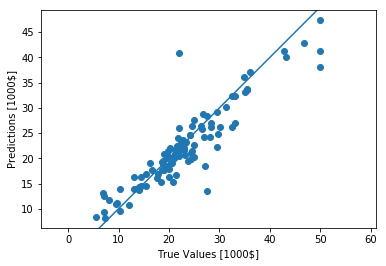

correlation r2 score is: 0.826357822703
correlation mse value is: 14.4546431036
correlation mae value is: 2.46735837413


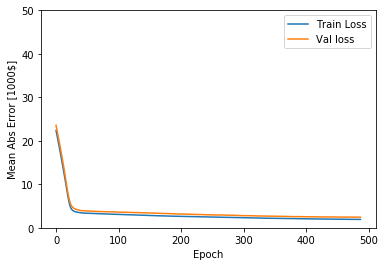

In [6]:
np.random.seed(7)
keras.backend.clear_session()

xtrain,ytrain,xtest,ytest = data_preprocess()
nnmodel                   = build_neuralnet()
ypredict, nnhistory       = train(xtrain,ytrain,xtest,nnmodel)

plot_data(ytest,ypredict)
plot_history(nnhistory)

## Notes, Tips
1. When in doubt, X it. (X = Google, Bing, Yahoo, ...) 
2. Read the keras, sklearn documentations for specific function/class details - They are well maintained
3. If something is not available in documentations, most probably it will be there in Stackoverflow
4. If something is not available in Stackoverflow, ask your question in Stackoverflow (didn't see that coming?)
5. If no one answers your question in Stackoverflow, Google Search lists many more links
6. ANN modeling has many parameters to tune including
    1. Optimizer: type, learning rate, momentum, ..
    2. Loss function: mae, mse, cross_entropy, ...
    3. Layers: Number of layers, Neurons per layer, activation function, initializers, regularizers, ...
    4. ...
7. Data preprocessing is important. Focus on accumulating maximum amount of information, and Engineering features. 
    1. Principal Component Analysis
    2. Normalizer, Scaler,
    3. Model based feature selection
    4. ...